## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform multiple linear regression to predict the price of a house. Make sure to check for assumptions.

### b) Defining the Metric for Success

The project will be a success when we are able to create a multiple linear regression model that fits at least 80% of the training data.

### c) Understanding the Context 

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

### d) Recording the Experimental Design

1. Load datasets and libraries
2. Clean data
3. Perform univariate and bivariate analysis
4. Check that the assumptions of multiple linear regression aren't violated
5. Perform multiple linear regression
6. Summarize findings
7. Provide recommendations
8. Challenge the solution

### e) Data Relevance

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

In [60]:
house = pd.read_csv('house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [61]:
# check dataset shape
house.shape

(21613, 21)

In [62]:
# chekc data types
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We will drop the 'id' and 'date' variables and then drop any duplicated values so that it will be easier to work with the dataset.

In [63]:
house = house.drop(columns = ['id', 'date'])

In [64]:
# dropping duplicates, if any
house.drop_duplicates(inplace = True)
house.shape

(21608, 19)

In [65]:
# check for missing data
house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

## <font color='#2F4F4F'>3. Data Analysis</font>

For our analysis, we will check the assumptions of multiple linear regression which include:
1. There must be a linear relationship between the independent variables and the target variable.
2. Few or no outliers.
3. Little to no multicollinearity.
4. Homoscedasticity - variance of error terms must be similar across the independent variables.
5. All residuals must be normally distributed. 

### 3.1 Checking linearity

In [66]:
# create list to store column names to test against 'price'
house_columns = house.columns.to_list()
house_columns.remove('price')
len(house_columns)


18

In [67]:
house_columns

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

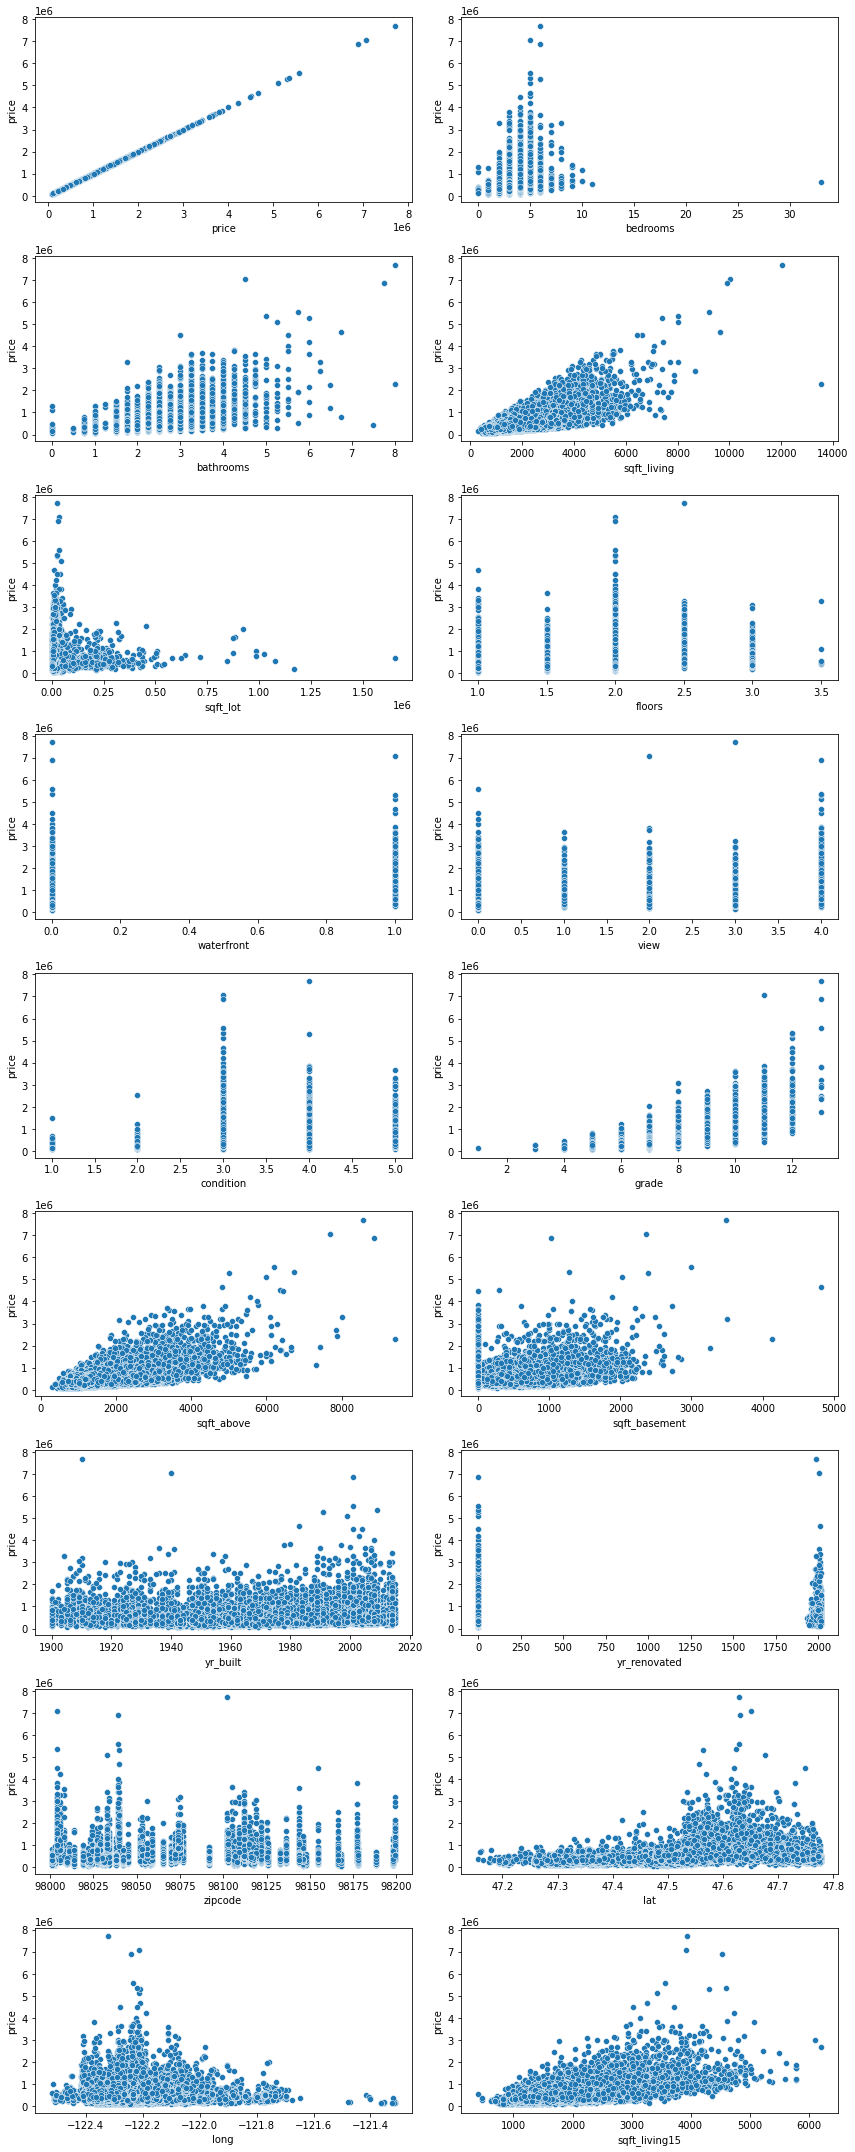

In [68]:
# creating scatterplots to observe the relationship between price and the variables
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (12, 30))

for ax, col in zip(axes.flatten(), house):
    sns.scatterplot(house[col], house['price'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("price")
    
plt.tight_layout()

What have you noticed? What will you do next?

there's a linear relationship between sqft_living & price as well as sqft_above & price.
There is linearity also betwee sqft_livingl5 and price, but not as pronouced.
There's no linearity on the other variables and price.\
there are 3 options:
1. Apply a nonlinear transformation to the predictor variable such as taking the log or the square root.
2.Add another predictor variable to the model.
3.Drop the predictor variable from the model

Next steps. we will not remove any of the non linear variables as most are not linealy related.


### 3.2 Checking for outliers

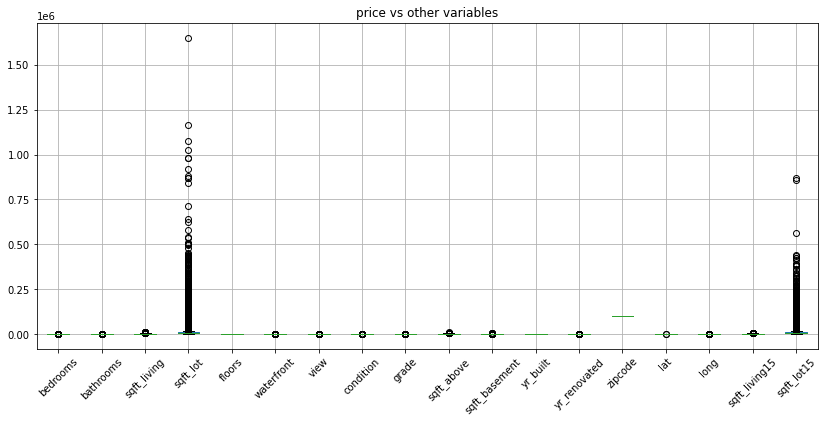

In [69]:
# create a boxplot to visualize the outliers

# looking for outliers
num_cols = house_columns


plt.figure(figsize = (14, 6))
house.boxplot(num_cols)
plt.xticks(rotation = 45)
plt.title('price vs other variables')
plt.show()

What observations can you make? What actions are you going to take next?

The outliers are on sqft_lot and sqft_lotl5. 

We can remove the outliers


In [70]:
# remove the outliers

house.drop(columns = ['sqft_lot','sqft_lot15'],  inplace = True)

In [71]:
house.head(5)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800


### 3.3 Checking multicollinearity

In [72]:
# create a heatmap of the correlations
corr = house.corr
corr

<bound method DataFrame.corr of           price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0      221900.0         3       1.00         1180     1.0           0     0   
1      538000.0         3       2.25         2570     2.0           0     0   
2      180000.0         2       1.00          770     1.0           0     0   
3      604000.0         4       3.00         1960     1.0           0     0   
4      510000.0         3       2.00         1680     1.0           0     0   
...         ...       ...        ...          ...     ...         ...   ...   
21608  360000.0         3       2.50         1530     3.0           0     0   
21609  400000.0         4       2.50         2310     2.0           0     0   
21610  402101.0         2       0.75         1020     2.0           0     0   
21611  400000.0         3       2.50         1600     2.0           0     0   
21612  325000.0         2       0.75         1020     2.0           0     0   

       condition  g

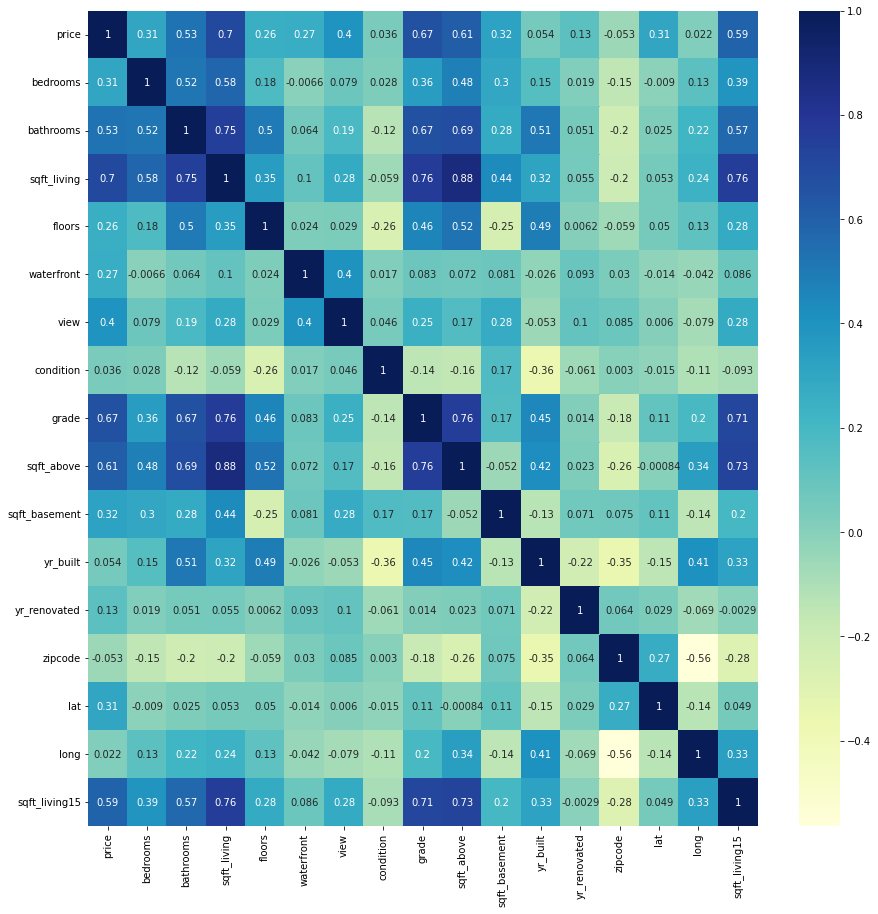

In [73]:
# plotting the correlations onto a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(house.corr(), annot=True, cmap ='YlGnBu') 

There is no perfect colleration between any of the variables, though there are string correlations og >=.075 between 
 *sqft_living & sqft_above
 *bathrooms & sqft_living
 *sqft_living& sqft_livingl5
 *grade & sqft_living

In [ ]:
# check VIF scores

# load statmodels functions
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant


In [74]:
house.head(5)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800


In [75]:
house.shape



(21608, 17)

In [76]:
#define x & y 

X= house.iloc[:,1:17] # independent variables

y= house['price'] #dependent variable


In [80]:
X.head(5)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800


In [112]:
# calculating correlations

# Remove the serial and admit chance columns, we want to focus on our independent variables only.
house_corr = house.drop(columns=['price'])
house_corr

corr = house_corr.corr()
corr


,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
bedrooms,1.000000,0.515956,0.576640,0.175608,-0.006591,0.079411,0.028370,0.357143,0.477569,0.303093,0.154410,0.018678,-0.152683,-0.008970,0.129395,0.391571
bathrooms,0.515956,1.000000,0.754717,0.500754,0.063747,0.187892,-0.124941,0.665029,0.685376,0.283824,0.506038,0.050880,-0.203837,0.024587,0.223065,0.568692
sqft_living,0.576640,0.754717,1.000000,0.354181,0.103817,0.284627,-0.058825,0.762893,0.876593,0.435061,0.318253,0.055299,-0.199396,0.052514,0.240150,0.756398
floors,0.175608,0.500754,0.354181,1.000000,0.023731,0.029383,-0.263728,0.458074,0.524117,-0.245646,0.489244,0.006193,-0.059153,0.049595,0.125592,0.280080
waterfront,-0.006591,0.063747,0.103817,0.023731,1.000000,0.401992,0.016648,0.082799,0.072076,0.080584,-0.026150,0.092949,0.030283,-0.014272,-0.041916,0.086466
view,0.079411,0.187892,0.284627,0.029383,0.401992,1.000000,0.045819,0.251426,0.167642,0.276993,-0.053196,0.103203,0.084857,0.006047,-0.078598,0.280391
condition,0.028370,-0.124941,-0.058825,-0.263728,0.016648,0.045819,1.000000,-0.144599,-0.158273,0.174061,-0.361306,-0.060875,0.002998,-0.014975,-0.106590,-0.092920
grade,0.357143,0.665029,0.762893,0.458074,0.082799,0.251426,-0.144599,1.000000,0.756090,0.168483,0.446887,0.014396,-0.184875,0.114100,0.198496,0.713396
sqft_above,0.477569,0.685376,0.876593,0.524117,0.072076,0.167642,-0.158273,0.756090,1.000000,-0.051932,0.424084,0.023217,-0.261132,-0.000837,0.343739,0.731846
sqft_basement,0.303093,0.283824,0.435061,-0.245646,0.080584,0.276993,0.174061,0.168483,-0.051932,1.000000,-0.133038,0.071315,0.074802,0.110543,-0.144789,0.200367


In [113]:

pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
bedrooms,1.638123,-0.466694,2.507611e+00,0.037747,0.062377,0.120986,-0.050582,0.304368,-2.727342e+00,-1.523816e+00,0.128455,0.046088,0.082066,0.041757,0.047654,0.022769
bathrooms,-0.466694,3.348407,1.839766e+01,-0.680106,0.010381,-0.040669,-0.136588,-0.270561,-1.797179e+01,-1.000799e+01,-0.936335,-0.259839,0.042598,-0.044024,0.064665,0.094556
sqft_living,2.142621,18.344104,1.120608e+15,0.943696,1.841848,-3.905970,-0.870516,22.700832,-1.010360e+15,-5.400023e+14,-10.173722,-2.808151,3.855664,-4.207782,8.085196,-6.011203
floors,0.037747,-0.680106,8.930140e-01,2.001241,-0.006149,-0.034364,0.089856,-0.231943,-1.291296e+00,1.880758e-01,-0.486275,-0.079719,-0.169116,-0.135562,0.190330,0.269916
waterfront,0.062377,0.010381,1.835386e+00,-0.006149,1.203612,-0.492062,-0.013214,0.049974,-1.765858e+00,-8.879305e-01,-0.022397,-0.066124,0.022603,0.009084,0.029086,0.052259
view,0.120986,-0.040669,-3.914887e+00,-0.034364,-0.492062,1.431562,-0.020574,-0.185428,3.556005e+00,1.628925e+00,0.155914,-0.038843,-0.141456,0.123333,0.057267,-0.321222
condition,-0.050582,-0.136588,-8.229130e-01,0.089856,-0.013214,-0.020574,1.248972,-0.053485,8.015754e-01,3.028166e-01,0.560248,0.206555,0.161202,0.063414,-0.006549,0.073452
grade,0.304368,-0.270561,2.261926e+01,-0.231943,0.049974,-0.185428,-0.053485,3.416083,-2.200833e+01,-1.139604e+01,-0.636886,-0.070661,0.083639,-0.331995,0.397728,-0.907616
sqft_above,-2.768710,-17.799015,-1.010360e+15,-1.322586,-1.769921,3.541984,0.841263,-22.074023,9.109587e+14,4.868756e+14,9.711322,2.530662,-3.557066,4.000692,-7.714646,3.897046
sqft_basement,-1.506356,-9.915254,-5.400023e+14,0.169492,-0.890625,1.620763,0.322034,-11.423729,4.868756e+14,2.602180e+14,5.152542,1.338983,-1.940678,1.953390,-3.771186,2.427966


In [83]:
###testing with a diff method

#import libraries

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('price ~ +bedrooms+ bathrooms+ sqft_living+ floors+ waterfront+ view+ condition+ grade+ sqft_above+ sqft_basement+ yr_built+ yr_renovated+ zipcode+ lat+ long+ sqft_living15', data=house, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,variable
0,4.534953e+06,Intercept
1,1.638123e+00,bedrooms
2,3.348407e+00,bathrooms
3,inf,sqft_living
4,2.001241e+00,floors
5,1.203612e+00,waterfront
6,1.431562e+00,view
7,1.248972e+00,condition
8,3.416083e+00,grade
9,inf,sqft_above


What have you noticed? What actions are you going to take next regarding this?
vif score for all is below 5, meaning we dont not have high levels of multicollinearity. Hence, we will leave data as is.


## <font color='#2F4F4F'>4. Data Modeling</font>

In [86]:
# split into features (X) and label (Y)
# splitting into 80-20 train-test sets

# load libraries
from sklearn.model_selection import train_test_split


In [87]:
# dividing our dataset into features (X) and target (y)

features= house.iloc[:,1:17]

target = house['price']

In [90]:
features.head(5)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800


In [89]:
target.shape

(21608,)

In [91]:
# split into 80-20 train and test sets

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.20, random_state=12345)

In [94]:
# fit regressor to data and make predictions

#using linear regression
#import linear regression model

from sklearn.linear_model import LinearRegression

# Training the algorithm

regressor = LinearRegression()
regressor.fit(features_train, target_train)



LinearRegression()

In [95]:
# Making Predictions

# After training our algorithm, we can now make some preditions
# We create the y_pred variable, which will contain the predicted values for the input values in the features_valid series

y_pred = regressor.predict(features_valid)
y_pred

array([390403.66318406, 333837.09500112, 406927.07299373, ...,
       373306.98813852, 635986.08208504, 658418.45669989])

In [96]:
# Next, we compare actual output values for features_valid with the predicted values
# This should also give us a sense of how our model performed during prediction

df = pd.DataFrame({'Actual': target_valid, 'Predicted': y_pred})
df.sample(5)

,Actual,Predicted
14863,240000.0,256283.394149
6835,190000.0,132684.970597
7242,560000.0,462747.050130
5631,720000.0,945529.964214
17070,406000.0,404925.398100


In [104]:
# evaluate RMSE and r-squared scores
# we will finally evaluate the performance of algorithm
from sklearn import metrics
from sklearn.metrics import r2_score

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_valid, y_pred)))

print('r-squared score Error', r2_score(target_valid, y_pred))


Root Mean Squared Error: 190938.7328514843
r-squared score Error 0.6895197483480768


In [105]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
count,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,5.400984e+05,3.370927,2.114738,2079.958950,1.494146,0.007544,0.234219,3.409478,7.656655,1788.414846,291.544104,1970.999907,84.330155,98077.942614,47.560050,-122.213894,1986.583164
std,3.671646e+05,0.930103,0.770238,918.505805,0.539910,0.086527,0.766169,0.650782,1.175484,828.141155,442.612560,29.371463,401.517026,53.506883,0.138578,0.140830,685.421474
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000
25%,3.218375e+05,3.000000,1.750000,1429.250000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000


In [99]:
#testing
from sklearn.metrics import mean_squared_error
import math

MSE = mean_squared_error(target_valid, y_pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

190938.7328514843


What conclusions have you drawn?
We can see that the value of root mean squared error is 190938, 
which is greater than 10% of the mean value of the price of 5. 
This means that our algorithm was inaccurate and cannot make good predictions.
hence we 
Need more data.Most of the data was not correlated, apart from 3 variables.
We can redo the modelling with only the variables and see the results.


### 4.1 Test for normality and homoscedasticity

In [117]:
house.head(5)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800


In [124]:
# create a dataframe of residuals
# remove bathroom and grade as they are nearing VIF score of 5 than the other, to see how the vif scores improve.

revised = house.drop(columns=['bathrooms','grade'])

revised.sample(5)



,price,bedrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
9207,425000.0,2,1160,1.0,0,0,3,1160,0,1947,0,98133,47.7244,-122.331,1440
7335,445500.0,3,1880,1.0,0,0,4,940,940,1941,0,98125,47.7131,-122.283,1390
8860,811000.0,2,2510,2.0,0,0,3,2510,0,1943,2014,98052,47.6832,-122.164,2440
2158,665000.0,3,1800,1.0,0,0,3,1800,0,1972,0,98008,47.6357,-122.119,1950
16678,305000.0,2,1030,1.0,0,0,3,1030,0,1925,0,98118,47.5669,-122.283,1510


In [125]:
X = revised.values
y = house['price'].values

# split into 80-20 train and test sets

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.20, random_state=12345)

regressor = LinearRegression()
regressor.fit(features_train, target_train)

# This is our prediction for admission based on our model
price_predict = regressor.predict(features_valid)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(price_predict, target_valid)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

7034.1186455741545

Our min and max for the residual are fairly high: they suggest we've been up to off target.

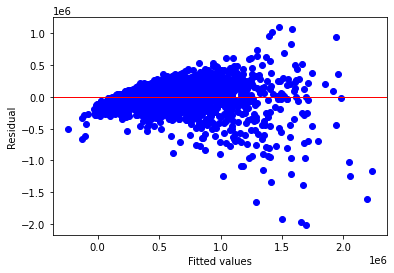

In [129]:
#plot residual plot

plt.scatter(price_predict, residuals, color='blue')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

What is your interpretation of the residual plot?

our residuals are centered around a mean that is close to 0

In [131]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value
test_result, p_value = sp.stats.bartlett(price_predict, residuals)

# computing the critical value of a chi-squared distribution
degree_of_freedom = len(y_pred) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)

Critical value: inf


If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [132]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

The variances are homogeneous (equal).


### 4.2 Boosting

We can try boosting to see if it will improve our model. We will experiment with 3 types of boosting:
- Ada Boosting
- Gradient Boosting
- eXtreme Gradient (XG) Boosting

In [135]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# creating a list of learning rates to use as hyperparameters
learning_rates = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# setting up our Ada booster
for lr in learning_rates:
    ada = AdaBoostRegressor(learning_rate = lr, random_state = 0)
    ada.fit(features_train, target_train)
    ada_predict = ada.predict(features_valid)
    print("Ada Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(target_valid, ada_predict)))
    print()
    
print("***************************************************") 

# setting up our Gradient booster
for lr in learning_rates:
    gradient = GradientBoostingRegressor(learning_rate = lr, random_state = 0)
    gradient.fit(features_train, target_train)
    gradient_predict = gradient.predict(features_valid)
    print("Gradient Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(target_valid, gradient_predict)))
    print()

print("***************************************************")

# setting up our XG booster
for lr in learning_rates:
    xgbr = XGBRegressor(learning_rate = lr, random_state = 0)
    xgbr.fit(features_train, target_train)
    xgbr_predict = xgbr.predict(features_valid)
    print("XG Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(target_valid, xgbr_predict)))
    print()

Ada Boosting Regression with Learning Rate: 0.1
RMSE Score: 195425.5857545612

Ada Boosting Regression with Learning Rate: 0.2
RMSE Score: 208725.95806140907

Ada Boosting Regression with Learning Rate: 0.3
RMSE Score: 225847.89258164636

Ada Boosting Regression with Learning Rate: 0.4
RMSE Score: 234496.16109150706

Ada Boosting Regression with Learning Rate: 0.5
RMSE Score: 247916.54683757515

Ada Boosting Regression with Learning Rate: 0.6
RMSE Score: 269312.6876833485

Ada Boosting Regression with Learning Rate: 0.7
RMSE Score: 289083.90437658457

Ada Boosting Regression with Learning Rate: 0.8
RMSE Score: 316925.26965476916

Ada Boosting Regression with Learning Rate: 0.9
RMSE Score: 327032.1872707342

***************************************************
Gradient Boosting Regression with Learning Rate: 0.1
RMSE Score: 123776.21055091891

Gradient Boosting Regression with Learning Rate: 0.2
RMSE Score: 117492.47362265564

Gradient Boosting Regression with Learning Rate: 0.3
RMSE Sco

In [137]:
print("Ada Boosting R-squared Score:", metrics.r2_score(target_valid, ada_predict))
print("Gradient Boosting R-squared Score:", metrics.r2_score(target_valid, gradient_predict))
print("XG Boosting R-squared Score:", metrics.r2_score(target_valid, xgbr_predict))

Ada Boosting R-squared Score: 0.08919185086457182
Gradient Boosting R-squared Score: 0.8481949212156742
XG Boosting R-squared Score: 0.8567781712928311


From the above analysis, we see that XG Boosting with a learning rate of 0.1 returned the lowest RMSE score (125,974). Although still higher than 10% of the target variable mean, it is a better score than that of the original linear regression. Also, the r-squared score of XG Boosting is 0.8 which means it fits about 80% of our data, which is much better than for linear regression.

## <font color='#2F4F4F'>5. Summary of Findings</font>

Our dataset met most of the assumptions for multiple linear regression such as normality and homoscedasticity. However, the assumptions on linearity, multicollinearity, and outliers were not fully met, thereby proving to be a poor data for multiple linear regression.

With XG Boosting, the model fit to about 80% of the data, thereby meeting our metric for success.

## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend that Knightly Frankly use XG Boost Regressor rather than Multiple Linear Regression to predict the prices of the houses.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes.

#### c) What can be done to improve the solution?
Apart from carrying out hyperparameter tuning, we can implement cross validation. Alternatively, we can try out other regression analysis models.